# CA 2 - Review of Agriculture in Ireland

## Notebook 1 - Exploratory Data Analysis



In [115]:
# Importing the libraries

# libraries for graphics
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

# create tables
from tabulate import tabulate

# graphics for calculations
import numpy as np
import pandas as pd

# libraries for analysis
import datetime 
import statistics
from scipy.stats import binom
from scipy.stats import poisson
import pylab
from scipy import stats

# data preparation
from sklearn.preprocessing import OneHotEncoder

### Step 1 - Import and view the dataframe

In [2]:
# Step 1 - import the dataframe

Organic_food_df = pd.read_csv("Datasets/org_aprod_linear.csv")

In [3]:
# view the shape of the dataframe

Organic_food_df.shape

(3935, 9)

In [4]:
# view the first lines of the dataframe

Organic_food_df.head()

,DATAFLOW,LAST UPDATE,freq,agriprod,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:ORG_APROD(1.0),02/12/22 23:00:00,A,B0010,T,BE,2016,5502.0,NaN
1,ESTAT:ORG_APROD(1.0),02/12/22 23:00:00,A,B0010,T,BE,2017,7321.0,NaN
2,ESTAT:ORG_APROD(1.0),02/12/22 23:00:00,A,B0010,T,BE,2018,8708.0,NaN
3,ESTAT:ORG_APROD(1.0),02/12/22 23:00:00,A,B0010,T,BE,2019,9601.0,NaN
4,ESTAT:ORG_APROD(1.0),02/12/22 23:00:00,A,B0010,T,BE,2020,10364.0,NaN


In [5]:
# Show the columns of the dataframe and count of values therein

Organic_food_df.count()

DATAFLOW       3935
LAST UPDATE    3935
freq           3935
agriprod       3935
unit           3935
geo            3935
TIME_PERIOD    3935
OBS_VALUE      3728
OBS_FLAG        367
dtype: int64

In [6]:
# display the 

Organic_food_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3935 entries, 0 to 3934
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATAFLOW     3935 non-null   object 
 1   LAST UPDATE  3935 non-null   object 
 2   freq         3935 non-null   object 
 3   agriprod     3935 non-null   object 
 4   unit         3935 non-null   object 
 5   geo          3935 non-null   object 
 6   TIME_PERIOD  3935 non-null   int64  
 7   OBS_VALUE    3728 non-null   float64
 8   OBS_FLAG     367 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 276.8+ KB


### Step 2 - Explore the Contents of the Dataframe

In [7]:
# check for duplicate rows of data

duplicate_rows_df = Organic_food_df[Organic_food_df.duplicated()]

print("Number of duplicate rows in the dataframe: ", duplicate_rows_df.shape)

Number of duplicate rows in the dataframe:  (0, 9)


In [8]:
# Check for null values in the dataframe 

print(Organic_food_df.isnull().sum())

DATAFLOW          0
LAST UPDATE       0
freq              0
agriprod          0
unit              0
geo               0
TIME_PERIOD       0
OBS_VALUE       207
OBS_FLAG       3568
dtype: int64


In [9]:
# count the unique values in the each column of the datafram

Organic_food_df.nunique()

DATAFLOW          1
LAST UPDATE       1
freq              1
agriprod         23
unit              2
geo              33
TIME_PERIOD      10
OBS_VALUE      1968
OBS_FLAG          7
dtype: int64

In [10]:
# count unique 'agriprod' values, grouped by geo (country)

Organic_food_df.groupby('agriprod')['geo'].nunique()

agriprod
B0010     30
B1000     30
B3100     30
B4100     29
B4200     28
B5000     26
B7000     30
B7100     10
B8000      8
B9000     26
D1100A    33
D1110A    32
D1120A    27
D1130A    30
D1140A    10
D2100     31
D2200     31
D4100     31
D6100     32
D7100     32
D8000H    33
D9500     25
D9910     24
Name: geo, dtype: int64

In [11]:
# count unique 'agriprod' values, grouped by geo (country)

#Organic_food_df.groupby('geo')['agriprod'].nunique()

In [12]:
#sns.pairplot(Organic_food_df, hue="geo");

In [13]:
#sns.pairplot(Organic_food_df, hue="agriprod");

### Step 4 - Data Preparation for analysis

Actions carried out based on table 1 in accompanying word report.

In [14]:
org_food_df = Organic_food_df.drop(['DATAFLOW', 'LAST UPDATE', 'freq', 'OBS_FLAG'], axis=1)

In [15]:
org_food_df.rename(columns = {
    'unit':'Unit',
    'geo':'Country',
    'TIME_PERIOD':'Year',
    'OBS_VALUE':'Value',
    },
      inplace=True)

In [16]:
# replace values

values_to_be_added = {
    'D1100A':'Raw milk', 
    'D1110A':'Raw cows milk', 
    'D1120A':'Ewes milk', 
    'D1130A':'Goats milk', 
    'D1140A':'Buffalos milk', 
    'D2100':'Drinking milk', 
    'D2200':'Cream ', 
    'D4100':'yoghurts and other', 
    'D6100':'Butter', 
    'D7100':'Cheese', 
    'D9500':'Other organic dairy products', 
    'D8000H':'Eggs', 
    'D9910':'Honey', 
    'B1000':'Bovine meat',
    'B0010':'Meat of livestock',
    'B8000':'Meat of rabbits',
    'B9000':'Other meat',
    'B3100':'Pigmeat ',
    'B4100':'Sheepmeat',
    'B4200':'Goat meat',
    'B5000':'Meat of horses etc',
    'B7000':'Poultry meat',
    'B7100':'Chicken',
     }

In [17]:
# add a new column based on the code in 'agriprod' column
# REFERENCE - https://sparkbyexamples.com/pandas/pandas-add-column-to-dataframe/

org_food_df['Description'] = org_food_df['agriprod'].map(values_to_be_added)

org_food_df

,agriprod,Unit,Country,Year,Value,Description
0,B0010,T,BE,2016,5502.0,Meat of livestock
1,B0010,T,BE,2017,7321.0,Meat of livestock
2,B0010,T,BE,2018,8708.0,Meat of livestock
3,B0010,T,BE,2019,9601.0,Meat of livestock
4,B0010,T,BE,2020,10364.0,Meat of livestock
...,...,...,...,...,...,...
3930,D9910,T,TR,2017,392.0,Honey
3931,D9910,T,TR,2018,495.0,Honey
3932,D9910,T,TR,2019,577.0,Honey
3933,D9910,T,TR,2021,1221.0,Honey


In [18]:
# replace values 

values_to_be_replaced = {
    'D1100A':'Dairy', 
    'D1110A':'Dairy', 
    'D1120A':'Dairy', 
    'D1130A':'Dairy', 
    'D1140A':'Dairy', 
    'D2100':'Dairy', 
    'D2200':'Dairy', 
    'D4100':'Dairy', 
    'D6100':'Dairy', 
    'D7100':'Dairy', 
    'D9500':'Dairy', 
    'D8000H':'Eggs', 
    'D9910':'Honey', 
    'B1000':'Meat',
    'B0010':'Meat',
    'B8000':'Meat',
    'B9000':'Meat',
    'B3100':'Meat',
    'B4100':'Meat',
    'B4200':'Meat',
    'B5000':'Meat',
    'B7000':'Meat',
    'B7100':'Meat',
     }

In [19]:

org_food_df['agriprod'] = org_food_df['agriprod'].map(values_to_be_replaced)

org_food_df

,agriprod,Unit,Country,Year,Value,Description
0,Meat,T,BE,2016,5502.0,Meat of livestock
1,Meat,T,BE,2017,7321.0,Meat of livestock
2,Meat,T,BE,2018,8708.0,Meat of livestock
3,Meat,T,BE,2019,9601.0,Meat of livestock
4,Meat,T,BE,2020,10364.0,Meat of livestock
...,...,...,...,...,...,...
3930,Honey,T,TR,2017,392.0,Honey
3931,Honey,T,TR,2018,495.0,Honey
3932,Honey,T,TR,2019,577.0,Honey
3933,Honey,T,TR,2021,1221.0,Honey


In [20]:
org_food_df.agriprod.unique()

array(['Meat', 'Dairy', 'Eggs', 'Honey'], dtype=object)

In [21]:
org_food_df.groupby('agriprod')['Country'].nunique()

agriprod
Dairy    33
Eggs     33
Honey    24
Meat     31
Name: Country, dtype: int64

### Step 5 - Data Formatting

#### One Hot Encoding of data

In [27]:
df2 = org_food_df

In [29]:
#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

In [30]:
#perform one-hot encoding on the 'agriprod' column 

encoder_df = pd.DataFrame(encoder.fit_transform(df2[['agriprod']]).toarray())

In [31]:
#merge one-hot encoded columns back with original DataFrame

final_df = df2.join(encoder_df)

In [32]:
#view final df

print(final_df)

     agriprod Unit Country  Year    Value        Description    0    1    2  \
0        Meat    T      BE  2016   5502.0  Meat of livestock  0.0  0.0  0.0   
1        Meat    T      BE  2017   7321.0  Meat of livestock  0.0  0.0  0.0   
2        Meat    T      BE  2018   8708.0  Meat of livestock  0.0  0.0  0.0   
3        Meat    T      BE  2019   9601.0  Meat of livestock  0.0  0.0  0.0   
4        Meat    T      BE  2020  10364.0  Meat of livestock  0.0  0.0  0.0   
...       ...  ...     ...   ...      ...                ...  ...  ...  ...   
3930    Honey    T      TR  2017    392.0              Honey  0.0  0.0  1.0   
3931    Honey    T      TR  2018    495.0              Honey  0.0  0.0  1.0   
3932    Honey    T      TR  2019    577.0              Honey  0.0  0.0  1.0   
3933    Honey    T      TR  2021   1221.0              Honey  0.0  0.0  1.0   
3934    Honey    T      UK  2019      0.0              Honey  0.0  0.0  1.0   

        3  
0     1.0  
1     1.0  
2     1.0  
3  

In [33]:
# rename columns '0', '1', 2' and '3'

final_df.rename(columns = {'0':'Dairy', '1':'Eggs', '2':'Honey', '3':'Meat'}, inplace = True )

In [34]:
# save to new .csv file

final_df.to_csv('Datasets/org_ds.csv')

### Step 6 - Split the DataFrame for analysis

Taking the organic food dataframe and the preparatory work done so far.  The dataframe is split on by category. The choosen dataset for analysis is the 'dairy' category. 
<br><br>
The dataframe is further split into milk with raw milk - specifically raw cow's milk, the chosen for the next subdivision.  The second split is to narrow down to one item to complete the analysis.


In [35]:
# import prepared df

org_df = pd.read_csv("Datasets/org_ds2.csv")

In [36]:
org_df.head()

,agriprod,Unit,Country,Year,Value,Description,Dairy,Eggs,Honey,Meat
0,Meat,T,BE,2016,5502.0,Meat of livestock,0,0,0,1
1,Meat,T,BE,2017,7321.0,Meat of livestock,0,0,0,1
2,Meat,T,BE,2018,8708.0,Meat of livestock,0,0,0,1
3,Meat,T,BE,2019,9601.0,Meat of livestock,0,0,0,1
4,Meat,T,BE,2020,10364.0,Meat of livestock,0,0,0,1


In [116]:
# split dataframe by 'agriprod'

# REFERENCE - https://towardsdatascience.com/filtering-data-frames-in-pandas-b570b1f834b9

dairy_df = org_df[org_df['agriprod']=='Dairy']

#eggs_df = org_df[org_df['agriprod']=='Eggs']
#honey_df = org_df[org_df['agriprod']=='Honey']
#meat_df = org_df[org_df['agriprod']=='Meat']

#check the dataframe post seperation
#dairy_df.head()

#### Split of dairy dataframe into raw milk dataframe

The dataframe is also split into Ireland and Spain, which is the selected country for analysis.

In [39]:
# create a new dataframe called 'milk_df'
milk_df = dairy_df

milk_df

,agriprod,Unit,Country,Year,Value,Description,Dairy,Eggs,Honey,Meat
1340,Dairy,T,AT,2014,443486.0,Raw milk,1,0,0,0
1341,Dairy,T,AT,2015,440924.0,Raw milk,1,0,0,0
1342,Dairy,T,AT,2016,552389.0,Raw milk,1,0,0,0
1343,Dairy,T,AT,2017,612629.0,Raw milk,1,0,0,0
1344,Dairy,T,AT,2018,635751.0,Raw milk,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
3797,Dairy,T,TR,2014,0.0,Other organic dairy products,1,0,0,0
3798,Dairy,T,TR,2015,3.0,Other organic dairy products,1,0,0,0
3799,Dairy,T,TR,2016,0.0,Other organic dairy products,1,0,0,0
3800,Dairy,T,TR,2017,0.0,Other organic dairy products,1,0,0,0


In [38]:
# update values to reflect all raw cows milk

milk_values_to_be_replaced = { 
    'Raw cows milk':'Raw milk', 
    'Drinking milk':'Raw milk',
     }

In [40]:
milk_df = milk_df.drop(['Meat', 'Honey', 'Dairy', 'Eggs'], axis=1)

In [41]:
milk_df['Description'] = milk_df['Description'].map(milk_values_to_be_replaced)

milk_df

,agriprod,Unit,Country,Year,Value,Description
1340,Dairy,T,AT,2014,443486.0,NaN
1341,Dairy,T,AT,2015,440924.0,NaN
1342,Dairy,T,AT,2016,552389.0,NaN
1343,Dairy,T,AT,2017,612629.0,NaN
1344,Dairy,T,AT,2018,635751.0,NaN
...,...,...,...,...,...,...
3797,Dairy,T,TR,2014,0.0,NaN
3798,Dairy,T,TR,2015,3.0,NaN
3799,Dairy,T,TR,2016,0.0,NaN
3800,Dairy,T,TR,2017,0.0,NaN


In [42]:
milk_df = milk_df[dairy_df['Description']=='Raw milk']

In [43]:
milk_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281 entries, 1340 to 1620
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   agriprod     281 non-null    object 
 1   Unit         281 non-null    object 
 2   Country      281 non-null    object 
 3   Year         281 non-null    int64  
 4   Value        281 non-null    float64
 5   Description  0 non-null      object 
dtypes: float64(1), int64(1), object(4)
memory usage: 15.4+ KB


In [50]:
# save milk_df to new csv file 
# Reason - notebook kept loosing the data in the 'Description' column.  
# The solution to keep data integrety was to save the formatted dataframe to a csv file and re-import to the notebook.

milk_df.to_csv('Datasets/milk_ds.csv')

In [53]:
# import milk_df to file for analysis

org_milk_df = pd.read_csv("Datasets/milk_df.csv")

# check the dataframe loaded into the notebook
org_milk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   agriprod     742 non-null    object 
 1   Unit         742 non-null    object 
 2   Country      742 non-null    object 
 3   Year         742 non-null    int64  
 4   Value        722 non-null    float64
 5   Description  742 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 34.9+ KB


#### Extract Irish Data from the Org_milk_df

In [83]:
# extract data for Ireland production of organic milk

irl_milk_df = org_milk_df[org_milk_df['Country']=='IE']

# review data
irl_milk_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 126 to 623
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   agriprod     21 non-null     object 
 1   Unit         21 non-null     object 
 2   Country      21 non-null     object 
 3   Year         21 non-null     int64  
 4   Value        21 non-null     float64
 5   Description  21 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.1+ KB


#### Extract Spanish Data from the Org_milk_df

In [91]:
# extract data for Spanish production of organic milk

es_milk_df = org_milk_df[org_milk_df['Country']=='ES']

# review data
#es_milk_df.info()

#### Save the datasets to a csv file for use in other notebooks

In [117]:
# save the Country datasets to new .csv files

es_milk_df.to_csv('Datasets/es_milk_df.csv')

irl_milk_df.to_csv('Datasets/irl_milk_df.csv')

### Step 7 Feature Engineering

Graphical review of the two country datasets


### Step 8 Graphical Review of the dataset

Graphical review of the two country datasets

#### Review of Irish data

,Year,Value
Year,1.000000,0.288259
Value,0.288259,1.000000


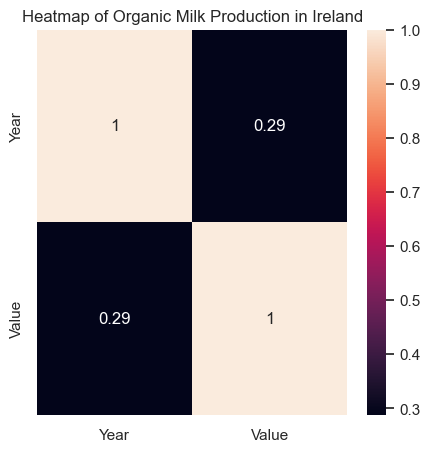

In [57]:
# Heatmap for Organic Milk Production in Ireland

#REFERENCE: https://seaborn.pydata.org/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap

plt.figure(figsize=(5,5))
irl_milk_corr = irl_milk_df.corr()
sns.heatmap(irl_milk_corr, annot=True);
plt.title("Heatmap of Organic Milk Production in Ireland")
irl_milk_corr

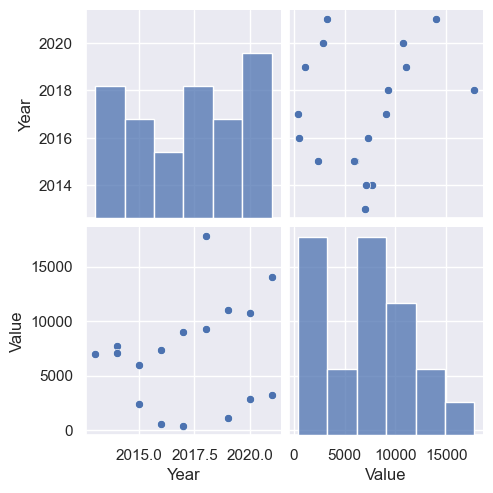

In [74]:
sns.pairplot(irl_milk_df)

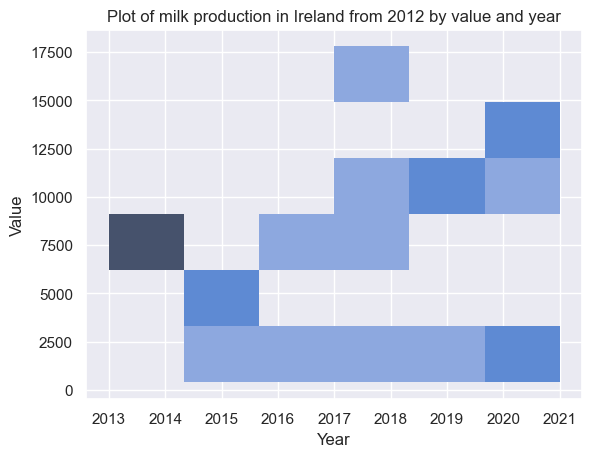

In [73]:
sns.histplot(data=irl_milk_df, x='Year', y='Value')
plt.title("Plot of milk production in Ireland from 2012 by value and year");

Text(0.5, 1.0, 'Plot of organic milk production in Ireland from 2012 by unit')

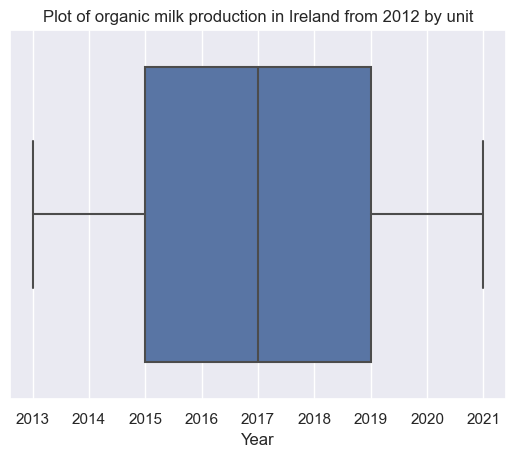

In [124]:
#sns.histplot(data=yr_2012_plus, x="year")
sns.boxplot(data=irl_milk_df, x='Year')
plt.title("Plot of organic milk production in Ireland from 2012 by unit")

#### Review of Spanish dataset

,Year,Value
Year,1.000000,0.777265
Value,0.777265,1.000000


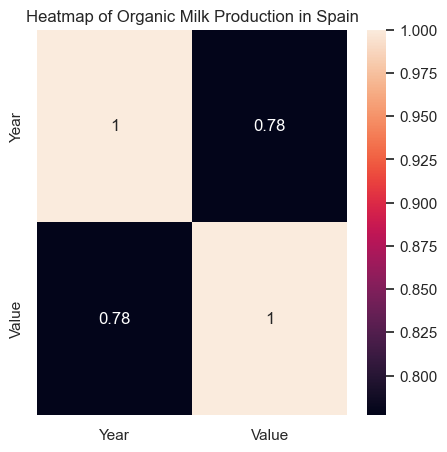

In [128]:
# Heatmap for Organic Milk Production in Ireland

plt.figure(figsize=(5,5))
es_milk_corr = es_milk_df.corr()
sns.heatmap(es_milk_corr, annot=True);
plt.title("Heatmap of Organic Milk Production in Spain")
es_milk_corr

Text(0.5, 1.0, 'Heatmap of Organic Milk Production in Spain')

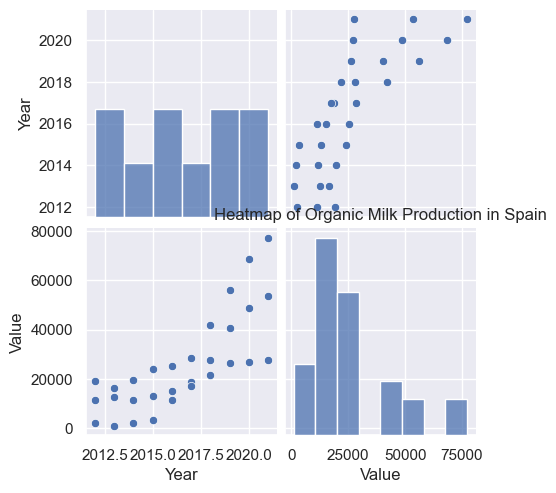

In [120]:
sns.pairplot(es_milk_df)
plt.title("Heatmap of Organic Milk Production in Spain")

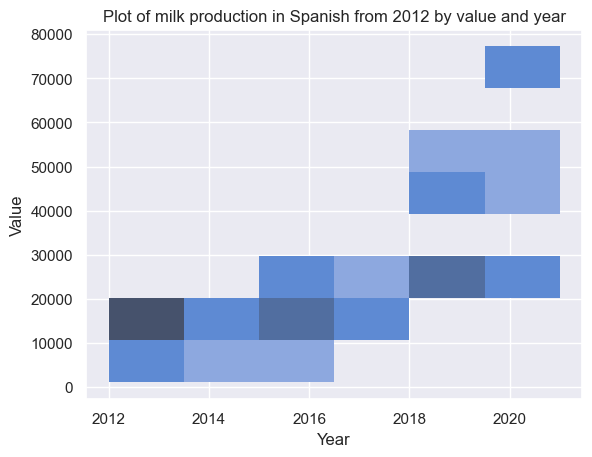

In [121]:
sns.histplot(data=es_milk_df, x='Year', y='Value')
plt.title("Plot of milk production in Spanish from 2012 by value and year");

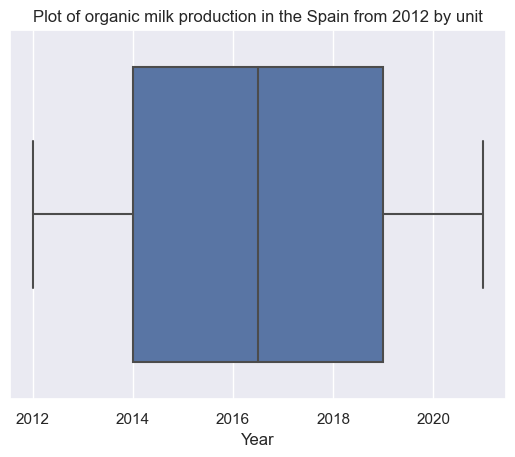

In [122]:
#sns.histplot(data=yr_2012_plus, x="year")
sns.boxplot(data=es_milk_df, x='Year')
plt.title("Plot of organic milk production in the Spain from 2012 by unit");

#### Graphic review of all data in the European Economic Community

,Year,Value
Year,1.000000,0.060525
Value,0.060525,1.000000


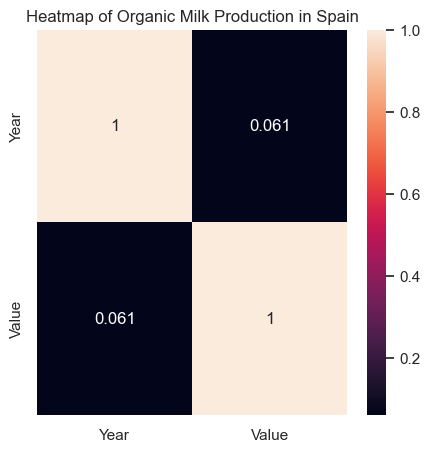

In [125]:
# Heatmap for Organic Milk Production in Ireland

plt.figure(figsize=(5,5))
org_milk_corr = org_milk_df.corr()
sns.heatmap(org_milk_corr, annot=True);
plt.title("Heatmap of Organic Milk Production in Spain")
org_milk_corr

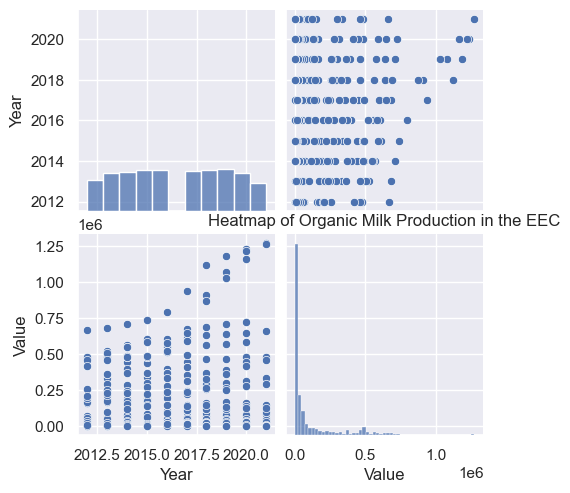

In [126]:
sns.pairplot(org_milk_df)
plt.title("Heatmap of Organic Milk Production in the EEC");

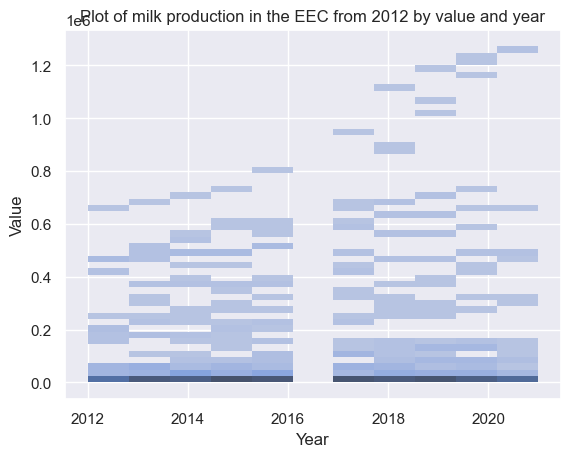

In [127]:
sns.histplot(data=org_milk_df, x='Year', y='Value')
plt.title("Plot of milk production in the EEC from 2012 by value and year");

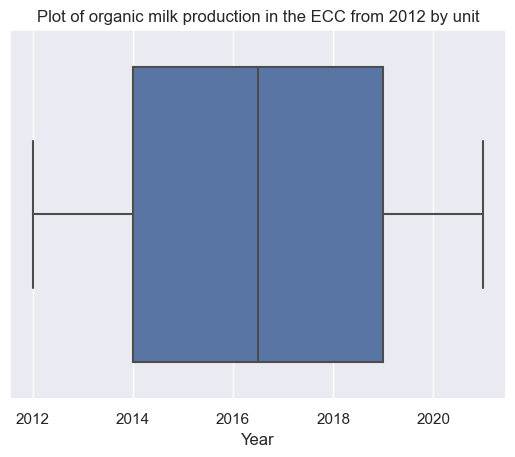

In [129]:
#sns.histplot(data=yr_2012_plus, x="year")
sns.boxplot(data=org_milk_df, x='Year')
plt.title("Plot of organic milk production in the ECC from 2012 by unit");